In [15]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns

# Homework 2

## FINM 25000 - 2025

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

## HBS Case

### *ProShares Hedge Replication ETF*

***

# 1. The ProShares ETF Product

**Section 1 is not graded**, and you do not need to submit your answers. But you are encouraged to think about them, and we will discuss them.

## 1. Alternative ETFs

Describe the two types of investments referenced by this term.

Answer:

The two types of investments referenced by "Alternative ETFs" are (1) alternative asset classes that are not "mainstream" such real estate, commodities previous metal, currencies and volatility, and (2) alternative strategies that are unconventional investment processes such as geared investing, L/S strats, market neutral, absolute return, convertable/merger arb., managed futures, global macro.

## 2. Hedge Funds.


* a. Using just the information in the case, what are two measures by which hedge funds are an attractive investment?

1. Attractive returns. From 1994 to 2013, hedge funds had 10% higher retursn than stock and more than twice as much as bonds. Additionally, hedge funds provided a "smoother ride" (i.e. a lower vol.).
2. Attractive risk-return characteristics in terms of sharpe ratio. Hedge funds has less than half the vol. of the S&P 500 and had annualized returns less than 1% lower than those respective companies. As a result, hedge fund allocation could provide a dominant efficient frontier and diversification benefits.

* b. What are the main benefits of investing in hedge funds via an ETF instead of directly?

There are many benefits for investing in hedge fund ETFs compared to direct investment.
- Democratization: more access for retail investors to hedge fund beta, rules-based investments strategy, lower fees (more money in the hands of investors)
- - Accessibility
- - Transparency
- - Lower fees
- - Liquidity
- - Diversification
- - Regulatory oversight
- - Tax reporting

## 3. The Benchmarks

* a. Explain as simply as possible how HFRI, MLFM, MLFM-ES, and HDG differ in their construction and purpose.

- - HFRI: a index available for hedge fund investors that was designed to reflect the collective performance of hedge funds through an equally weighted composite of over 2,000 constituent hedge funds that were available to accredited investors
- - MLFM: a statistical multi-factor model designed to track the performance of hedge funds (Factors: S&P 500, Russell 2000, MSCI EAFE, MSCI Emerging Markets, Eurodollar/US dollar exchange rate, three-month Eurodollar Deposit yields)
- - MLFM-ES: an adapted version MLFM but the six index components were tradable, the three-month Eurodollar deposit yields were replaced with US Treasury Bills and the dollar/euro exchange rates were replaced with ProShares UltraShort Euro (EUO)
- - HDG: Hedge Fund Replication ETF, a ProShare's liquid alternative strategy product that provided exposure to hedge funds at low fees, with full transparency and providing daily liquidity

* b. How well does the Merrill Lynch Factor Model (MLFM) track the HFRI?

- - The MLFM had a correlation coefficient of 90% with HFRI

* c. In which factor does the MLFM have the largest loading? (See a slide in Exhibit 1.)

- - The factor with the largest loading was the 3-month T-Bills

* d. What are the main concerns you have for how the MLFM attempts to replicate the HFRI?

- - The factors were limited and didn't fully envelope potential sources of returns in HFRI
- - The regression used to determine the weights was backward-looking and lagged behind changes in hedge fund styles
- - Whether the model captures hedge fund alpha or beta. The purpose of investing is to earn "alpha" but if MLFM only captured beta to the factor than it might not replicate the skill of the hedge fund managers


## 4. The HDG Product

* a. What does ProShares ETF, HDG, attempt to track? Is the tracking error small?

- - HDG attempts to track the performance of MLFM --> MLFM-ES with a very high correlation (99.7%).

* b. HDG is, by construction, delivering beta for investors. Isn't the point of hedge funds to generate alpha? Then why would HDG be valuable?

- - Yes, the point of hedge funds is to generate alpha. However, HDG is valuable since it provides the benefits of hedge funds ETFs as mentioned earlier including: accessibility, transperancy, lower fees, liquidity, etc.

* c. The fees of a typical hedge-fund are 2% on total assets plus 20% of excess returns if positive. HDG's expense ratio is roughly 1% on total assets. What would their respective net Sharpe Ratios be, assuming both have a gross excess returns of 10% and volatility of 20%?


In [16]:
sharpe_ratio = ((1 - 0.02) * (1 - 0.2) * (1 - 0.01) * 0.1) / 0.2

print(f" The sharpe ratio would be: {sharpe_ratio:.2f}")

 The sharpe ratio would be: 0.39


***

# 2.  Analyzing the Data

Use the data found on Canvas, in <b>'proshares analysis data.xlsx'</b>.

It has monthly data on financial indexes and ETFs from `Aug 2011` through `May 2025`.

Note: we will be using the 2024 dataset due to the missing HFRI column in the 2025 dataset.

In [17]:
hedge_fund_series_df_2024 = pd.read_excel(io = "./proshares_analysis_data_2024.xlsx",
                                     sheet_name='hedge_fund_series',
                                     index_col=0,
                                     parse_dates=[0])

hedge_fund_series_df_2024.head(5)

,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
2011-08-31,-0.032149,-0.025588,-0.025689,-0.027035,-0.006491
2011-09-30,-0.038903,-0.032414,-0.032593,-0.032466,-0.022142
2011-10-31,0.026858,0.043593,0.043320,0.050532,0.025241
2011-11-30,-0.013453,-0.012142,-0.012431,-0.028608,-0.007965
2011-12-31,-0.004479,0.001938,0.001796,0.012875,0.001854


## 1.

For the series in the "hedge fund series" tab, report the following summary statistics:
* mean
* volatility
* Sharpe ratio

Annualize these statistics.

In [18]:
#based on functions from hw1
def metrics(returns_df):
  return_metrics = pd.DataFrame()

  adjustment_factor = 12

  return_metrics['Annualized Mean'] = returns_df.mean() * adjustment_factor
  return_metrics['Annualized Volatility'] = returns_df.std() * np.sqrt(adjustment_factor)
  return_metrics['Annualized Sharpe Ratio'] = return_metrics['Annualized Mean'] / return_metrics['Annualized Volatility']
  return return_metrics.T

display(metrics(hedge_fund_series_df_2024))

,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
Annualized Mean,0.041447,0.030670,0.029239,0.019442,0.016958
Annualized Volatility,0.060416,0.057147,0.056985,0.059589,0.049895
Annualized Sharpe Ratio,0.686023,0.536686,0.513102,0.326268,0.339873


## 2.

For the series in the "hedge fund series" tab, calculate the following statistics related to tail-risk.
* Skewness
* Excess Kurtosis (in excess of 3)
* VaR (.05) - the fifth quantile of historic returns
* CVaR (.05) - the mean of the returns at or below the fifth quantile
* Maximum drawdown - include the dates of the max/min/recovery within the max drawdown period.

There is no need to annualize any of these statistics.

In [19]:
def tail_risk(returns_df, quantile):
  summary = pd.DataFrame()
  summary['Skewness'] = returns_df.skew() #skewness function
  summary['Excess Kurtosis'] = returns_df.kurtosis() # excess kurtosis function
  summary['Var (0.05)'] = returns_df.quantile(q = 0.05, axis='index') #fifth quantile
  summary['CVar (0.05)'] = returns_df[returns_df <= returns_df.quantile(q=0.05, axis='index')].mean() #mean of the returns at or below fifth quantile

  #max drawdown calculations
  index = 1000 * (1 + returns_df).cumprod() #cumulative product of all returns given $1000
  peaks = index.cummax() #highest points of the data at or before that date
  drawdowns = (index - peaks) / peaks #pct. calculation for drawdowns ()
  summary['Max Drawdown'] = drawdowns.min() #smallest on an absolute basis (more neg. the bigger drawdown)

  # dates for maximum / peak of each drawdown
  summary['Peak (in max. drawdown period)'] = peaks.idxmax()

  #dates for minimum / troughs of each drawdown
  summary['Trough (in max. drawdown period)'] = drawdowns.idxmin()

  recovery_dates = dict()
  for col in returns_df.columns:
      peak_date = summary.loc[col, 'Peak (in max. drawdown period)']
      trough_date = summary.loc[col, 'Trough (in max. drawdown period)']

      peak_value = index[col].loc[peak_date]

      index_after_trough = index[col].loc[trough_date:]

      recovery_date = index_after_trough[peak_value <= index_after_trough].index.min()
      recovery_dates[col] = recovery_date if recovery_date else pd.NaT

  summary['Recovery Date'] = recovery_dates

  return summary

display(tail_risk(hedge_fund_series_df_2024, 0.05))

,Skewness,Excess Kurtosis,Var (0.05),CVar (0.05),Max Drawdown,Peak (in max. drawdown period),Trough (in max. drawdown period),Recovery Date
HFRIFWI Index,-0.979063,5.955123,-0.025324,-0.037478,-0.115473,2021-10-31,2020-03-31,2021-10-31
MLEIFCTR Index,-0.244981,1.689648,-0.028764,-0.035857,-0.124302,2021-06-30,2022-09-30,NaT
MLEIFCTX Index,-0.231032,1.657903,-0.029119,-0.035816,-0.124388,2021-06-30,2022-09-30,NaT
HDG US Equity,-0.233880,1.799098,-0.031209,-0.037577,-0.140721,2021-06-30,2022-09-30,NaT
QAI US Equity,-0.461338,1.825993,-0.020593,-0.032695,-0.137712,2021-06-30,2022-09-30,NaT


## 3.

For the series in the "hedge fund series" tab, run a regression of each against SPY (found in the "merrill factors" tab.) Include an intercept. Report the following regression-based statistics:
* Market Beta
* Treynor Ratio
* Information ratio

Annualize these three statistics as appropriate.

In [20]:
merrill_factors_df_2024 = pd.read_excel(io = "./proshares_analysis_data_2024.xlsx",
                                     sheet_name='merrill_factors',
                                     index_col=0,
                                     parse_dates=[0])

merrill_factors_df_2024.head(5)

,SPY US Equity,USGG3M Index,EEM US Equity,EFA US Equity,EUO US Equity,IWM US Equity
2011-08-31,-0.054976,0.000009,-0.092549,-0.087549,-0.005889,-0.088913
2011-09-30,-0.069449,0.000017,-0.179064,-0.108083,0.142180,-0.111541
2011-10-31,0.109147,-0.000013,0.162986,0.096275,-0.069502,0.151012
2011-11-30,-0.004064,0.000000,-0.019723,-0.021764,0.054627,-0.003783
2011-12-31,0.010440,0.000009,-0.043017,-0.022139,0.075581,0.005114


In [21]:
def univariate_regression(funds, explanatory):
    """
    Function is designed to calculate the univariate regression of y against X.
    Can also do downside beta (when market < 0) and upside beta (when market > 0)

    Returns:
        DataFrame: Summary of results
    """
    reg_results = []
    for fund in funds.columns:
      response = funds[fund]
        # set-up of Ordinary Least Sqaured Regression (drop missing values & add constant for regression)
      results = sm.OLS(response, sm.add_constant(explanatory), missing = 'drop').fit()

      # constant and slope of explanatory variable (index 0 and 1 respectively)
      parameters = results.params

      intercept = parameters.iloc[0] # returns in excess of the market
      beta = parameters.iloc[1]

      summary = dict()

      summary['Alpha'] = intercept * 12
      summary['Beta'] = beta

      summary['R-Squared'] = results.rsquared

      # normalize returns by the amount of market risk being taken on
      summary['Treynor Ratio'] = (response.mean() / beta) * 12 # annualize the ratio

      residuals = results.resid

      #returns in excess of the market penalized by the variance of the regression
      summary['Information Ratio'] = (intercept / residuals.std()) * np.sqrt(12) #annualize the ratio

      reg_results.append(pd.DataFrame(summary, index = [response.name]))
    return pd.concat(reg_results)

univariate_regression(hedge_fund_series_df_2024, merrill_factors_df_2024['SPY US Equity'])


,Alpha,Beta,R-Squared,Treynor Ratio,Information Ratio
HFRIFWI Index,-0.003559,0.348217,0.710668,0.119027,-0.109520
MLEIFCTR Index,-0.014549,0.349859,0.801824,0.087664,-0.571877
MLEIFCTX Index,-0.015806,0.348514,0.800212,0.083896,-0.620547
HDG US Equity,-0.027027,0.359536,0.778808,0.054075,-0.964387
QAI US Equity,-0.021053,0.294096,0.743252,0.057662,-0.832728


## 4.

Discuss the previous statistics, and what they tell us about...

* the differences between SPY and the hedge-fund series?
* which performs better between HDG and QAI.
* whether HDG and the ML series capture the most notable properties of HFRI.

In [22]:
pd.concat([metrics(hedge_fund_series_df_2024[['HDG US Equity', 'QAI US Equity']]),
           tail_risk(hedge_fund_series_df_2024[['HDG US Equity', 'QAI US Equity']], 0.05).T,
           univariate_regression(hedge_fund_series_df_2024[['HDG US Equity', 'QAI US Equity']], merrill_factors_df_2024['SPY US Equity']).T])

,HDG US Equity,QAI US Equity
Annualized Mean,0.019442,0.016958
Annualized Volatility,0.059589,0.049895
Annualized Sharpe Ratio,0.326268,0.339873
Skewness,-0.23388,-0.461338
Excess Kurtosis,1.799098,1.825993
Var (0.05),-0.031209,-0.020593
CVar (0.05),-0.037577,-0.032695
Max Drawdown,-0.140721,-0.137712
Peak (in max. drawdown period),2021-06-30 00:00:00,2021-06-30 00:00:00
Trough (in max. drawdown period),2022-09-30 00:00:00,2022-09-30 00:00:00


In [23]:
print('MLEIFCTR Index regression:')
display(univariate_regression(hedge_fund_series_df_2024[['HFRIFWI Index']], hedge_fund_series_df_2024['MLEIFCTR Index']))
print()
print('MLEIFCTX Index regression:')
display(univariate_regression(hedge_fund_series_df_2024[['HFRIFWI Index']], hedge_fund_series_df_2024['MLEIFCTX Index']))
print()
print('HDG US Equity regression:')
display(univariate_regression(hedge_fund_series_df_2024[['HFRIFWI Index']], hedge_fund_series_df_2024['HDG US Equity']))

MLEIFCTR Index regression:


,Alpha,Beta,R-Squared,Treynor Ratio,Information Ratio
HFRIFWI Index,0.012403,0.946981,0.802341,0.043768,0.461765



MLEIFCTX Index regression:


,Alpha,Beta,R-Squared,Treynor Ratio,Information Ratio
HFRIFWI Index,0.0137,0.94898,0.801157,0.043675,0.508522



HDG US Equity regression:


,Alpha,Beta,R-Squared,Treynor Ratio,Information Ratio
HFRIFWI Index,0.024008,0.896975,0.782678,0.046208,0.852416


1. Overall, all of the funds had a positive beta (from 0.29 to 0.35). This means that on a relative basis, the funds were mildly sensitive to movements in the overall market and generally have similar sensitivities. Additionally, the ML series had two of the highest Treynor ratios. In other words, given the amount of market risk being taken, the MLEIFCTR index and MLEIFCTX index yielded the highest relative return. On the other hand, QAI and HDG had the next two lowest Treynor ratios. Lastly, all four of the funds had negative information ratios. Firstly, this means that all four funds' returns in excess of the market (their alphas) were negative (i.e. their returns were lower than the market return). Secondly, penalizing this excess return to the their volatility leads to HDG having a nearly -93.3% info ratio followed by QAI at -72.2%. The ML series have milder info ratios as -52.7% and -58.4%. This means that while HDG may have a large negative excess return, on a relative basis its vol. is lowest comapred to the other funds with respect to their individual excess returns.
2. 'Better' is a very ambiguous term. Based on the data above (metrics, tail_risk, and univariate regression), QAI does have the lowest beta, and as a result, is least sensitive to market movements than the other funds. In the sense that better performance means the least amount of systematic risk, then yes, QAI performs better. When considering nominal returns as the sole indicator of performance than HDG and QAI are nearly identical at 2.3%. However, when considering excess returns to the market (alpha), QAI has a larger (less negative) alpha than HDG. Therefore, if better performance means net returns of both of a fund in excess of the market, than QAI is the better choice.
3. Based on the above analytics, it does seem like HDG and the ML series do capture the most notable properites of HRFI. In all cases the information ratios are positive and above 0.46. Additionally, their betas are all atleast 0.89 which indicates a very high sensitivity to HRFI. Lastly, the correlations are all very high of atleast 0.78 such that atleast 78% of all the variation in the three indices can be explained by HRFI.

## 5.
# REDO WITH PROPER DATA

Report the correlation matrix for these assets.
* Show the correlations as a heat map.
* Which series have the highest and lowest correlations?

<Axes: >

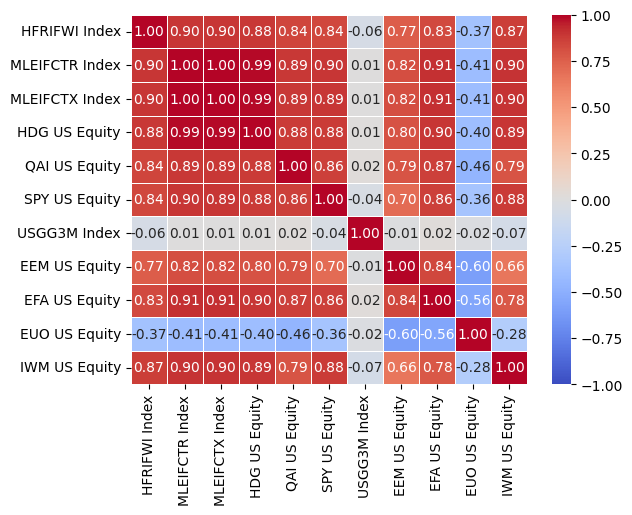

In [24]:


corr_matrix = pd.concat([hedge_fund_series_df_2024,  merrill_factors_df_2024], axis=1).corr()

sns.heatmap(corr_matrix,
            cmap="coolwarm",
            annot=True,
            vmin = -1,
            vmax = 1,
            linewidths=0.7,
            fmt = ".2f",
            )


Based on the above heat map, the following indices / funds have very high (0.71 to 1) correlation with each other: HRIFWI index, MLEIFCTR index, MLEIFCTX index, HDG US Equity, QAI US Equity, SPY US Equity, EEM US Equity, EFA US Equity, IWM US Equity. The USGG3M index seems to be the only asset with practically no correlation vs. the rest of the assets. EUO US Equity seems to be the only asset with negative (-0.31 to -0.61) correlation vs. the rest of the assets.

## 6.

# REDO WITH PROPER DATA

Replicate HFRI with the six factors listed on the "merrill factors" tab. Include a constant, and run the unrestricted regression,

$\newcommand{\hfri}{\text{hfri}}$
$\newcommand{\merr}{\text{merr}}$

$$\begin{align}
r^{\hfri}_{t} &= \alpha^{\merr} + x_{t}^{\merr}\beta^{\merr} + \epsilon_{t}^{\merr}\\[5pt]
\hat{r}^{\hfri}_{t} &= \hat{\alpha}^{\merr} + x_{t}^{\merr}\hat{\beta}^{\merr}
\end{align}$$

Note that the second equation is just our notation for the fitted replication.

a. Report the intercept and betas.

b. Are the betas realistic position sizes, or do they require huge long-short positions?

c. Report the R-squared.

d. Report the volatility of $\epsilon^{\merr}$, the tracking error.

In [25]:
def multivariate_regression(fund, explanatory):
  """
  Function is designed to calculate the multivariate regression of y against X.
  Can also do downside beta (when market < 0) and upside beta (when market > 0)

  Args:
    funds: a dataframe with the target variables
    explanatory: a dataframe with the explanatory variables
  Returns:
      DataFrame: Summary of results
  """
  results = sm.OLS(fund, sm.add_constant(explanatory), missing = 'drop').fit()

  # constant and slope of explanatory variable (index 0 and 1 respectively)
  parameters = results.params

  intercept = parameters.iloc[0] # returns in excess of the market (annualized)
  betas = parameters.iloc[1:] #exclude first var. as it's the intercept

  summary = dict()
  summary['Intercept'] = intercept * 12

  summary['R-Squared'] = results.rsquared

  residuals = results.resid
  summary['Tracking Error'] = residuals.std() * np.sqrt(12)

  explanatory_vars = explanatory.columns

  for i, col in enumerate(explanatory_vars):
      summary[f"{col} Beta"] = betas.iloc[i]

  print(results.summary())

  return pd.DataFrame(summary, index = [fund.name]).T

multivariate_regression(hedge_fund_series_df_2024['HFRIFWI Index'], merrill_factors_df_2024)

                            OLS Regression Results                            
Dep. Variable:          HFRIFWI Index   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     114.7
Date:                Sun, 06 Jul 2025   Prob (F-statistic):           1.64e-50
Time:                        16:16:15   Log-Likelihood:                 502.35
No. Observations:                 142   AIC:                            -990.7
Df Residuals:                     135   BIC:                            -970.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0015      0.001      1.905

,HFRIFWI Index
Intercept,0.017794
R-Squared,0.836058
Tracking Error,0.024462
SPY US Equity Beta,0.029963
USGG3M Index Beta,-0.370915
EEM US Equity Beta,0.079118
EFA US Equity Beta,0.084161
EUO US Equity Beta,0.023106
IWM US Equity Beta,0.153294


The intercept (alpha) in this multivariate regression model is 0.017794.

The R-Squared in this multivariate regression model is 0.836058 which means that about 83.6% of the variation of the response variable HFRI can be explained by the six factors in the Merrill Multi Factor model.

The tracking error is 2.4462% which means that HFRI's returns deviate from the six factor model's returns by 2.4462%.

The betas are quite reasonable. If we wanted to develop a portfolio that tracked the factor betas, the relatvie exposures to each of the factors is not too far fetched. Unlike the example in HW1 where weights of 1000% and -1300% were placed on certain assets, the betas do range relatively close here (-0.37 to 0.15).

## 7.

Let's examine the replication out-of-sample (OOS).

Starting with $t = 61$ month of the sample, do the following:

* Use the previous 60 months of data to estimate the regression equation.
This gives time-t estimates of the regression parameters, $\tilde{\alpha}^{\merr}_{t}$ and $\tilde{\beta}^{\merr}_{t}$.

* Use the estimated regression parameters, along with the time-t regressor values, $x^{\merr}_{t}$, calculate the time-t replication value that is, with respect to the regression estimate, built "out-of-sample" (OOS).

$$\hat{r}^{\hfri}_{t} \equiv \tilde{\alpha}^{\merr} + (x_{t}^{\merr})'\tilde{\beta}^{\merr}$$

* Step forward to $t = 62$, and now use $t = 2$ through $t = 61$ for the estimation. Re-run the steps above, and continue this process throughout the data series. Thus, we are running a rolling, 60-month regression for each point-in-time.

How well does the out-of-sample replication perform with respect to the target?

OOS R-Squared: 80.87%


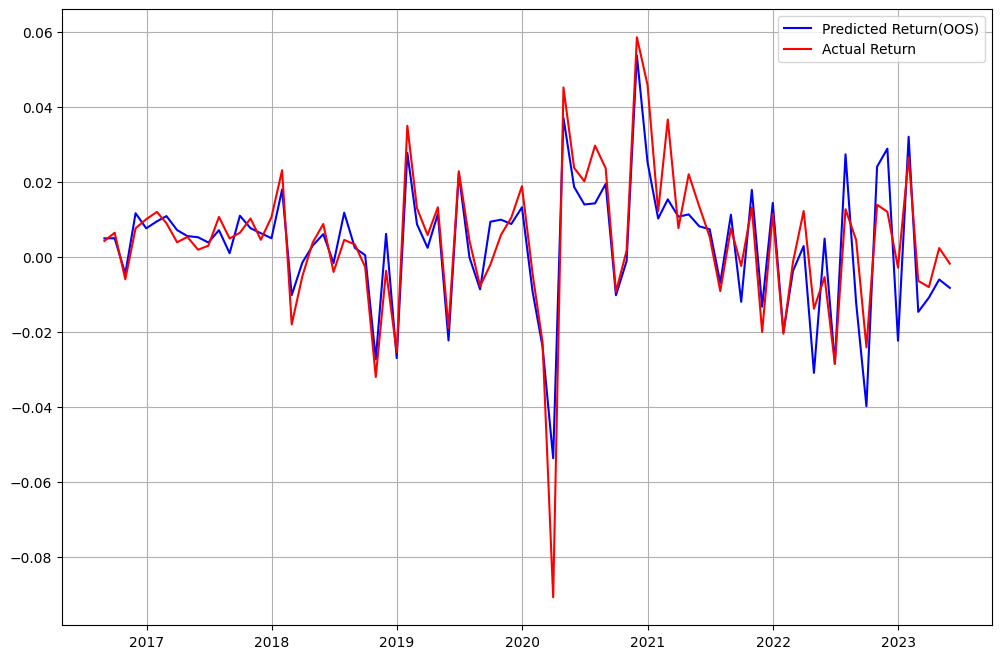

In [26]:
from collections import defaultdict
import matplotlib.pyplot as plt

def oos_rolling_regression(fund, explanatory):
  """
  This function is designed to calculate the out-of-sample rolling regression of fund against explanatory (factors).

  Args:
    fund: a dataframe with the target variables
    explanatory: a dataframe with the explanatory variables (factors)

  Returns:
      DataFrame: Summary of results
  """
  summary = defaultdict(list)
  for t in range(60, len(fund)):
    #select the in-sample factors and HFRI returns
    past_factors = explanatory.iloc[t - 60:t].copy()
    past_fund_rets = fund.iloc[t - 60:t].copy()

    # actual rets of fund at time t
    oos_y = fund.iloc[t].copy()

    #actual factors at time t
    oos_x = explanatory.iloc[t].copy()

    # run regression of past fund performance against past factor performance
    model = sm.OLS(past_fund_rets, sm.add_constant(past_factors), missing = 'drop').fit()
    intercept = model.params.iloc[0]
    betas = model.params.iloc[1:]

    #create a dictionry of key, value pairs representing parameter and coefficient pairs
    for idx, parameter in enumerate(model.params.index):
      summary[parameter].append(model.params.iloc[idx])



    prediction = intercept + betas @ oos_x

    summary['Predicted Return(OOS)'].append(prediction)
    summary['Actual Return'].append(oos_y)

  summary = pd.DataFrame(summary, index = fund.index[60:])

  return summary

# the rolling regression for this problem
rolling_regr = oos_rolling_regression(hedge_fund_series_df_2024['HFRIFWI Index'], merrill_factors_df_2024)

#r-squared calculation given the built in correlation function in python
r_squared = rolling_regr['Predicted Return(OOS)'].corr(rolling_regr['Actual Return'])**2


#displaying statistics
print(f'OOS R-Squared: {r_squared:.2%}')

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(rolling_regr['Predicted Return(OOS)'], label = 'Predicted Return(OOS)', color = 'blue')
ax.plot(rolling_regr['Actual Return'], label = 'Actual Return', color = 'red')
ax.grid(True)
ax.legend();


***

# 3.  Extensions
<i>**This section is not graded, and you do not need to submit it.** Still, we may discuss it in class some extensions in class.

For those looking for a challenge, try a few of these.

## 1.

Merrill constrains the weights of each asset in its replication regression of HFRI. Try constraining your weights by re-doing 2.6.

* Use Non-Negative Least Squares (NNLS) instead of OLS.
* Go further by using a Generalized Linear Model to put separate interval constraints on each beta, rather than simply constraining them to be non-negative.

#### Hints
* Try using LinearRegression in scikit-learn with the parameter `positive=True`.
* Try using GLM in statsmodels.

## 2.

Let's decompose a few other targets to see if they behave as their name suggests.

* Regress HEFA on the same style factors used to decompose HFRI. Does HEFA appear to be a currency-hedged version of EFA?

* Decompose TRVCI with the same style factors used to decompose HFRI. The TRVCI Index tracks venture capital funds--in terms of our styles, what best describes venture capital?

* TAIL is an ETF that tracks SPY, but that also buys put options to protect against market downturns. Calculate the statistics in questions 2.1-2.3 for TAIL. Does it seem to behave as indicated by this description? That is, does it have high correlation to SPY while delivering lower tail risk?

## 3.

The ProShares case introduces Levered ETFs. ProShares made much of its name originally through levered, or "geared" ETFs.

Explain conceptually why Levered ETFs may track their index well for a given day but diverge over time. How is this exacerbated in volatile periods like 2008?

## 4.

Analyze SPXU and UPRO relative to SPY.
- SPXU is ProShares -3x SPX ETF.
- UPRO is ProShres +3x SPX ETF.

Questions:
* Analyze them with the statistics from 2.1-2.3.

* Do these two ETFs seem to live up to their names?

* Plot the cumulative returns of both these ETFs along with SPY.

* What do you conclude about levered ETFs?

## 5.

In `Section 2`, we estimated the replications using an intercept. Try the full-sample estimation, but this time without an intercept.

$$\begin{align}
r^{\hfri}_{t} &= \alpha^{merr} + x_{t}^{\merr}\beta^{\merr} + \epsilon_{t}^{\merr}\\[5pt]
\check{r}^{\hfri}_{t} &= \check{\alpha}^{\merr} + x_{t}^{\merr}\check{\beta}^{\merr}
\end{align}$$

Report

* the regression beta. How does it compare to the estimated beta with an intercept, $\hat{\beta}^{\merr}$?

* the mean of the fitted value, $\check{r}^{\hfri}_{t}$. How does it compare to the mean of the HFRI?

* the correlations of the fitted values, $\check{r}^{\hfri}_{t}$ to the HFRI. How does the correlation compare to that of the fitted values with an intercept, $\hat{r}^{\hfri}_{t}$

Do you think Merrill and ProShares fit their replicators with an intercept or not?

***